<a href="https://colab.research.google.com/github/van-richard/Machine_Learning_Tutorials/blob/main/Introduction_to_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Overview { display-mode: "form" }
#@markdown 1. Linear Models
#@markdown     -  Linear Regression
#@markdown 2. Nonlinear Models
#@markdown     - Logistic Regression
#@markdown         - Sigmoid Function 
#@markdown         - Hyperbolic Tangent

!pip install mpl_interactions[jupyter] &> /dev/null
!pip install "ipywidgets>=7,<8" &> /dev/null
!wget https://github.com/van-richard/Machine_Learning_Tutorials/raw/main/img.zip
!unzip img.zip
!rm -r sample_data img.zip

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Please restart kernal by:")
print("\t Runtime > Restart Runtime")

interactive(children=(IntSlider(value=1, description='m', max=5, min=-5), Output()), _dom_classes=('widget-int…

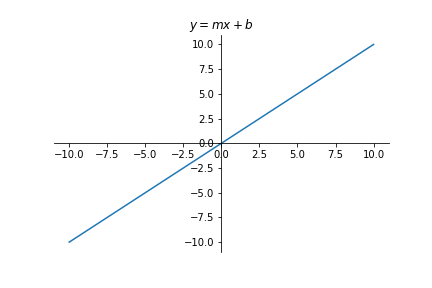

In [53]:
#@title Linear Regression { display-mode: "form" }

#@markdown \begin{equation}
#@markdown y = mx + b
#@markdown \tag{1}
#@markdown \end{equation}

#@markdown Linear regression assumes a straight line relationship between your input variable, _x_, to your output variable, _y_, where:
#@markdown - _m_ represents the slope of your line
#@markdown - _x_ represents some input variable
#@markdown - _b_ represents a constant which also intersects your y-axis

#@markdown As an example, we can plot this function, _m_ is can be a value in [-5,5], while leaving the _b_ as zero (0).

%matplotlib ipympl
from google.colab import output
output.enable_custom_widget_manager()

x = np.linspace(-10, 10, 100)

def f(x, m, b=0):
    return m * x + b

fig, ax = plt.subplots()
line, = ax.plot(x, f(x, m=1, b=0))

def update(m = 1):
    line.set_ydata(f(x,m,b=0))
    fig.canvas.draw_idle()
    
interact(update, m = (-5,5,1));

# Formating plot
ax.set_title('$y = mx + b$')
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')




Graphically, this equation, y = 2x, can be shown as our neuron for NN:
<br>

<p align="center" width="100%">
    <img width="75%" src="img/y_mx.png">
</p>

If we include a value(s) of _b_, we get variations in the y-intersection.